## MATH 210 Introduction to Mathematical Computing

## March 6, 2017

1. More numerical differentiation with SciPy
    * Taylor polynomials
2. Linear algebra with SciPy
    * Matrix multiplication of NumPy arrays using @
    * Solving systems of equations with `linsolve`
3. Exercises

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.  Numerical differentiation

The SciPy function `scipy.misc.derivative` computes derivatives using the central difference formula. Let's import it and do an example with Taylor polynomials.

In [22]:
from scipy.misc import derivative

In [23]:
derivative?

### Example: Taylor series

Let's plot the Taylor polynomial $T_3(x)$ of degree 3 centered at $x=0$ for $f(x) = \frac{3e^x}{x^2 + x + 1}$ over the interval $x \in [-3,3]$. First, let's plot the graph $y=f(x)$:

In [24]:
def f(x):
    return 3*np.exp(x) / (x**2 + x + 1)

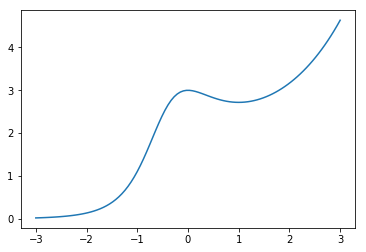

In [25]:
x = np.linspace(-3,3,100)
y = f(x)
plt.plot(x,y);

Let's compute the coefficients $a_n = \frac{f^{(n)}(0)}{n!}$ for $n=0,1,2,3$:

In [26]:
a0 = f(0)
a1 = derivative(f,0,dx=0.001,n=1)
a2 = derivative(f,0,dx=0.001,n=2) / 2
a3 = derivative(f,0,dx=0.001,n=3,order=5) / 6
# The parameter order specifies the number of points to use (check the documentation)
# The value order must be odd and at least n + 1

print(a0,a1,a2,a3)

3.0 1.99999838912e-06 -1.50000037502 1.99999206085


Finally, let's plot $f(x)$ and $T_3(x)$ together:

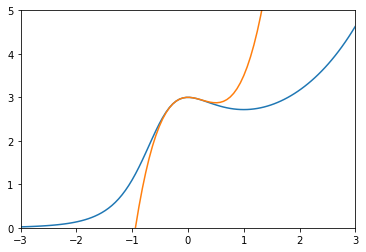

In [27]:
T3 = a0 + a1*x + a2*x**2 + a3*x**3
plt.plot(x,y,x,T3), plt.xlim([-3,3]), plt.ylim([0,5]);

## 2. Linear algebra

The main linear algebra package in SciPy is [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html). It contains many linear algebra functions to use with NumPy arrays. So let's import `scipy.linalg` and do some examples!

In [28]:
import scipy.linalg as la

### Matrix multiplication

Let's create a NumPy array and do some computations:

In [29]:
M = np.array([[3,4],[-1,5]])
M

array([[ 3,  4],
       [-1,  5]])

Remember that NumPy array operations are performed element by element. For example, array multiplication is performed element by element which is different from matrix multiplication.

In [30]:
M * M

array([[ 9, 16],
       [ 1, 25]])

To do matrix multiplication with NumPy arrays we use the @ operator.

In [31]:
M @ M

array([[ 5, 32],
       [-8, 21]])

Let's compute $2I + 3A - AB$ for $A = \begin{bmatrix} 1 & 3 \\ -1 & 7 \end{bmatrix}$ and $B = \begin{bmatrix} 5 & 2 \\ 1 & 2 \end{bmatrix}$

In [32]:
I = np.eye(2)
I

array([[ 1.,  0.],
       [ 0.,  1.]])

In [33]:
A = np.array([[1,3],[-1,7]])
A

array([[ 1,  3],
       [-1,  7]])

In [34]:
B = np.array([[5,2],[1,2]])
B

array([[5, 2],
       [1, 2]])

In [35]:
2*I + 3*A - A@B

array([[ -3.,   1.],
       [ -5.,  11.]])

Notice that we the asterisk `*` for scalar multiplication.

### Solving linear systems of equations

We solve linear systems of equations $Ax = b$ (where $A$ is an $n$ by $n$ matrix) using the `solve` function. Check the documentation:

In [36]:
la.solve?

Let's create a random matrix of integers $A$ sampled from the closed interval $[0,9]$:

In [37]:
N = 5
A = np.random.randint(0,10,[N,N])
A

array([[2, 4, 5, 7, 8],
       [2, 3, 1, 2, 1],
       [2, 4, 8, 0, 0],
       [7, 7, 6, 9, 8],
       [9, 2, 2, 5, 7]])

Let's create a random column vector of integers $b$ sampled from the closed interval $[0,9]$:

In [38]:
b = np.random.randint(0,10,[N,1])
b

array([[3],
       [7],
       [7],
       [0],
       [3]])

Let's solve the system $Ax = b$:

In [39]:
x = la.solve(A,b)
x

array([[ -0.84801762],
       [  8.4030837 ],
       [ -3.11453744],
       [-10.42731278],
       [  7.45594714]])

Let's verify that the output $x$ is a solution of $Ax = b$:

In [40]:
A @ x

array([[ 3.],
       [ 7.],
       [ 7.],
       [ 0.],
       [ 3.]])

Success!

## 3. Exercises

**Exercise.** Plot the Taylor polynomial $T_4(x)$ of degree 4 centered at $x=0$ of the function

$$
f(x) = \cos(x) + \sin(2x)
$$

over the interval $x \in [-\pi,\pi]$.

**Exercise.** Compute the matrix equation $AB + 2B^2 - I$ for matrices $A = \begin{bmatrix} 3 & 4 \\ -1 & 2 \end{bmatrix}$ and $B = \begin{bmatrix} 5 & 2 \\ 8 & -3 \end{bmatrix}$.

**Excercise.** Solve the linear system of equations

$$
\begin{array}{rrrrrrr}
2x & + & 5y & - & z &= & 1 \\
x & - & y & + & 2z &= &2 \\
3x & - & y & + & 2z &=& -1 \\
\end{array}
$$